# Coursera IBM Applied Data Science - Capstone Project - The Battle of Neighborhoods

## Week 1 - Introduction

### Define the problem

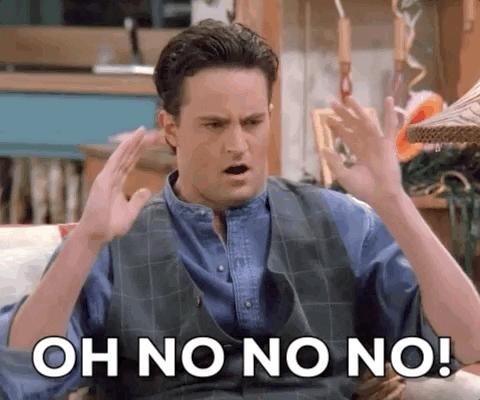

In [8]:
from IPython.display import HTML
HTML('<img src="https://media2.giphy.com/media/WpaVhEcp3Qo2TjwyI1/giphy.gif">')

[here the link if it doesn't appear] https://media2.giphy.com/media/WpaVhEcp3Qo2TjwyI1/giphy.gif

_"Oh no no no!"_ ... that's what I was thinking!    
  
Corona hit, my company went bankrupt, and thus I quickly had to readjust and find a new job. Luckily, I quickly got two job offers - and you guessed it: in Toronto and Manhattan!  
However, I now was in the **dilema (problem question)** of deciding **which job offer to take.**  
  
My 'stakeholders':  
My wife...


In [116]:
from IPython.display import HTML
HTML('<img src="https://media.giphy.com/media/NzG65cJEDH56w/giphy.gif">')

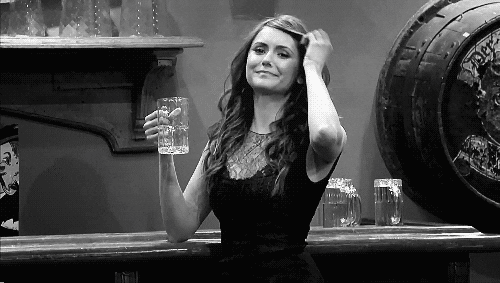

[here the link if it doesn't appear] https://media.giphy.com/media/NzG65cJEDH56w/giphy.gif

In [117]:
from IPython.display import HTML
HTML('<img src="https://media1.giphy.com/media/3orif777ltBKZ02jyE/giphy.gif">')

...and my son...

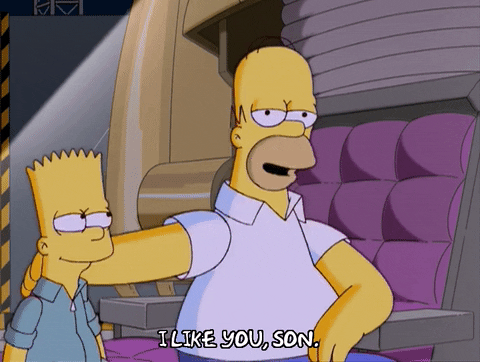

[here the link if it doesn't appear] https://media1.giphy.com/media/3orif777ltBKZ02jyE/giphy.gif

To make both happy ( _and not to forget myself_ ), I must regard these preferences of my family:
* my son loves **pizza** and the **gym** (kind of a contradicition...yet true)
* my wife wants a **bakery** close
* and i like to read a good book in a **park**
  
"Happy wife, happy life!" - so let's do this. Using the Foursquare location data, I will check which neighborhoods meet these requirements best and thus pick one to live in.


### Describe the data

Since the Foursquare location data is free and I just learned how to use it, I will use just that: the **Foursquare location data**  
Since it provides data about such venues as needed for my "family problem", that should be enough.

In case you are not familiar with Foursquare:  
_"Foursquare is a social networking service available for common smartphones, including the iPhone, BlackBerry and Android-powered phones."_  (smallbusiness.com)  
_" Foursquare has gone from a social media app that let users broadcast their favorite bars or restaurants online by “checking-in,” to a company that provides location-based data to some of the biggest retail names in the world: Apple, Microsoft and Samsung to name a few."_ (cnbc.com)

## Week 2 - Methodology, Results, Discussion and Conclusion

### Methodology

download the dependencies that we will need

In [9]:
!pip -q install folium

In [10]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### load New York (Manhattan) data  
  
For NY, we will be using the free dataset from: https://geo.nyu.edu/catalog/nyu_2451_34572

In [11]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [12]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [13]:
neighborhoods_data = newyork_data['features']

transform data in pd_df

In [14]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

loop through the data and fill the dataframe one row at a time.

In [15]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

check result

In [16]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

Use geopy library to get the latitude and longitude values of New York City.

In [17]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [18]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

Borough        Neighborhood   Latitude  Longitude
0  Manhattan         Marble Hill  40.876551 -73.910660
1  Manhattan           Chinatown  40.715618 -73.994279
2  Manhattan  Washington Heights  40.851903 -73.936900
3  Manhattan              Inwood  40.867684 -73.921210
4  Manhattan    Hamilton Heights  40.823604 -73.949688

geographical coordinates of Manhattan.

In [19]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


Define Foursquare Credentials and Version to make further analysis

In [20]:
CLIENT_ID = '0PH2SU1HKG0SUFI5MY0O42BOXZW3E5IDPXEV2UCM5LDZIAMU' # your Foursquare ID
CLIENT_SECRET = 'OQJB5TF31Z055PXDKXMVRFOKI3AGVLHQ4UFGITOIDTYJPYD4' # your Foursquare Secret
VERSION = '20200422'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: 0PH2SU1HKG0SUFI5MY0O42BOXZW3E5IDPXEV2UCM5LDZIAMU
CLIENT_SECRET:OQJB5TF31Z055PXDKXMVRFOKI3AGVLHQ4UFGITOIDTYJPYD4


In order to explore the entire Manhattan data, we first explore the first neighborhood in our dataframe. We do that so that we can do these steps again later in a loop for all neighborhoods in Manhattan.  
I will do the same for the Toronto data later (see further below).  
I will be using a radius of 400m and a limit of 80 returned venues.

In [21]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

In [22]:
LIMIT = 80 # limit of number of venues returned by Foursquare API
radius = 400 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [23]:
results = requests.get(url).json()

borrow the **get_category_type** function from the Foursquare lab.

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

clean the json and structure it into a *pandas* dataframe.

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name   categories        lat        lng
0     Arturo's  Pizza Place  40.874412 -73.910271
1  Bikram Yoga  Yoga Studio  40.876844 -73.906204
2      Dunkin'   Donut Shop  40.877136 -73.906666
3     Rite Aid     Pharmacy  40.875467 -73.908906
4    Starbucks  Coffee Shop  40.873755 -73.908613

create a function to repeat the same process to all the neighborhoods in Manhattan

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [28]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Analyze Each Neighborhood

In [29]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.  
This will help me to determine which neighborhood are more or less suited for my family

In [30]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0  Battery Park City                0.0             0.0                0.0   
1      Carnegie Hill                0.0             0.0                0.0   
2     Central Harlem                0.0             0.0                0.0   
3            Chelsea                0.0             0.0                0.0   
4          Chinatown                0.0             0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0            0.000000             0.000000           0.0     0.0   
1            0.000000             0.012500           0.0     0.0   
2            0.045455             0.045455           0.0     0.0   
3            0.000000             0.025000           0.0     0.0   
4            0.000000             0.037500           0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                  0.0000     0.000000      0.0000   
1               0.0                  0.0125     0.000000      0.0125   
2               0.0                  0.0000     0.022727      0.0000   
3               0.0                  0.0000     0.062500      0.0000   
4               0.0                  0.0000     0.000000      0.0000   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auditorium  \
0                  0.0             0.000            0.018868    0.018868   
1                  0.0             0.000            0.000000    0.000000   
2                  0.0             0.000            0.000000    0.000000   
3                  0.0             0.000            0.000000    0.000000   
4                  0.0             0.025            0.000000    0.000000   

   Australian Restaurant  Austrian Restaurant  BBQ Joint  Baby Store  \
0                    0.0               0.0000   0.000000         0.0   
1                    0.0               0.0000   0.000000         0.0   
2                    0.0               0.0000   0.022727         0.0   
3                    0.0               0.0000   0.000000         0.0   
4                    0.0               0.0125   0.000000         0.0   

   Bagel Shop  Bakery  Bank       Bar  Baseball Field  Basketball Court  \
0    0.000000  0.0000   0.0  0.000000             0.0               0.0   
1    0.012500  0.0125   0.0  0.025000             0.0               0.0   
2    0.022727  0.0000   0.0  0.045455             0.0               0.0   
3    0.012500  0.0250   0.0  0.000000             0.0               0.0   
4    0.000000  0.0375   0.0  0.012500             0.0               0.0   

   Basketball Stadium  Beer Bar  Beer Garden  Beer Store  \
0                 0.0  0.000000     0.018868         0.0   
1                 0.0  0.000000     0.000000         0.0   
2                 0.0  0.022727     0.000000         0.0   
3                 0.0  0.012500     0.000000         0.0   
4                 0.0  0.000000     0.000000         0.0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail    Bistro  Board Shop  \
0                       0.0     0.0000         0.0  0.018868         0.0   
1                       0.0     0.0000         0.0  0.000000         0.0   
2                       0.0     0.0000         0.0  0.000000         0.0   
3                       0.0     0.0000         0.0  0.000000         0.0   
4                       0.0     0.0125         0.0  0.000000         0.0   

   Boat or Ferry  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0       0.037736   0.000000  0.000000         0.0                   0.0   
1       0.000000   0.037500  0.000000         0.0                   0.0   
2       0.000000   0.022727  0.022727         0.0                   0.0   
3       0.000000   0.025000  0.012500         0.0                   0.0   
4       0.000000   0.000000  0.025000         0.0                   0.0   

   Breakfast Spot  Bridal Shop  Bridge  Bubble Tea Shop  Building  \
0             0.0 

function to sort the venues in descending order.

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

create the new dataframe and display the top 5 venues for each neighborhood.

In [32]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0  Battery Park City                  Park                   Gym   
1      Carnegie Hill           Coffee Shop                  Café   
2     Central Harlem                   Bar  Gym / Fitness Center   
3            Chelsea           Coffee Shop           Art Gallery   
4          Chinatown          Cocktail Bar                   Spa   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                 Hotel         Memorial Site           Coffee Shop  
1           Pizza Place    Italian Restaurant                   Gym  
2    African Restaurant   American Restaurant    Seafood Restaurant  
3    Italian Restaurant        Ice Cream Shop    Seafood Restaurant  
4                Bakery   American Restaurant    Chinese Restaurant

let's create a new df with the data of interest (i.e. Gym, Pizza, Bakery).  
Since my son doesn't box or climb, let's only combine 'Gym' and 'Gym / Fitness Center' (and neglect 'Boxing Gym' and 'Climbing Gym')

In [33]:
manhattan_grouped_excerpt = manhattan_grouped.filter(['Neighborhood', 'Bakery', 'Gym', 'Gym / Fitness Center', 'Pizza Place', 'Park'], axis=1)
manhattan_grouped_excerpt['Gym total'] = manhattan_grouped_excerpt['Gym'] + manhattan_grouped_excerpt['Gym / Fitness Center'] # add the sum of Gym and Gym / Fitness Center
manhattan_grouped_excerpt.head()

Neighborhood  Bakery       Gym  Gym / Fitness Center  Pizza Place  \
0  Battery Park City  0.0000  0.075472              0.000000     0.000000   
1      Carnegie Hill  0.0125  0.037500              0.037500     0.037500   
2     Central Harlem  0.0000  0.022727              0.045455     0.022727   
3            Chelsea  0.0250  0.012500              0.000000     0.012500   
4          Chinatown  0.0375  0.000000              0.000000     0.012500   

       Park  Gym total  
0  0.113208   0.075472  
1  0.000000   0.075000  
2  0.022727   0.068182  
3  0.012500   0.012500  
4  0.000000   0.000000

filter out columns 'Gym', 'Gym / Fitness Center' because we have merged them

In [34]:
manhattan_grouped_excerpt = manhattan_grouped_excerpt.filter(['Neighborhood', 'Bakery', 'Pizza Place', 'Park', 'Gym total'], axis=1) # filter out old columns
manhattan_grouped_excerpt.head()

Neighborhood  Bakery  Pizza Place      Park  Gym total
0  Battery Park City  0.0000     0.000000  0.113208   0.075472
1      Carnegie Hill  0.0125     0.037500  0.000000   0.075000
2     Central Harlem  0.0000     0.022727  0.022727   0.068182
3            Chelsea  0.0250     0.012500  0.012500   0.012500
4          Chinatown  0.0375     0.012500  0.000000   0.000000

let's plot the results quickly for a short glance at the data

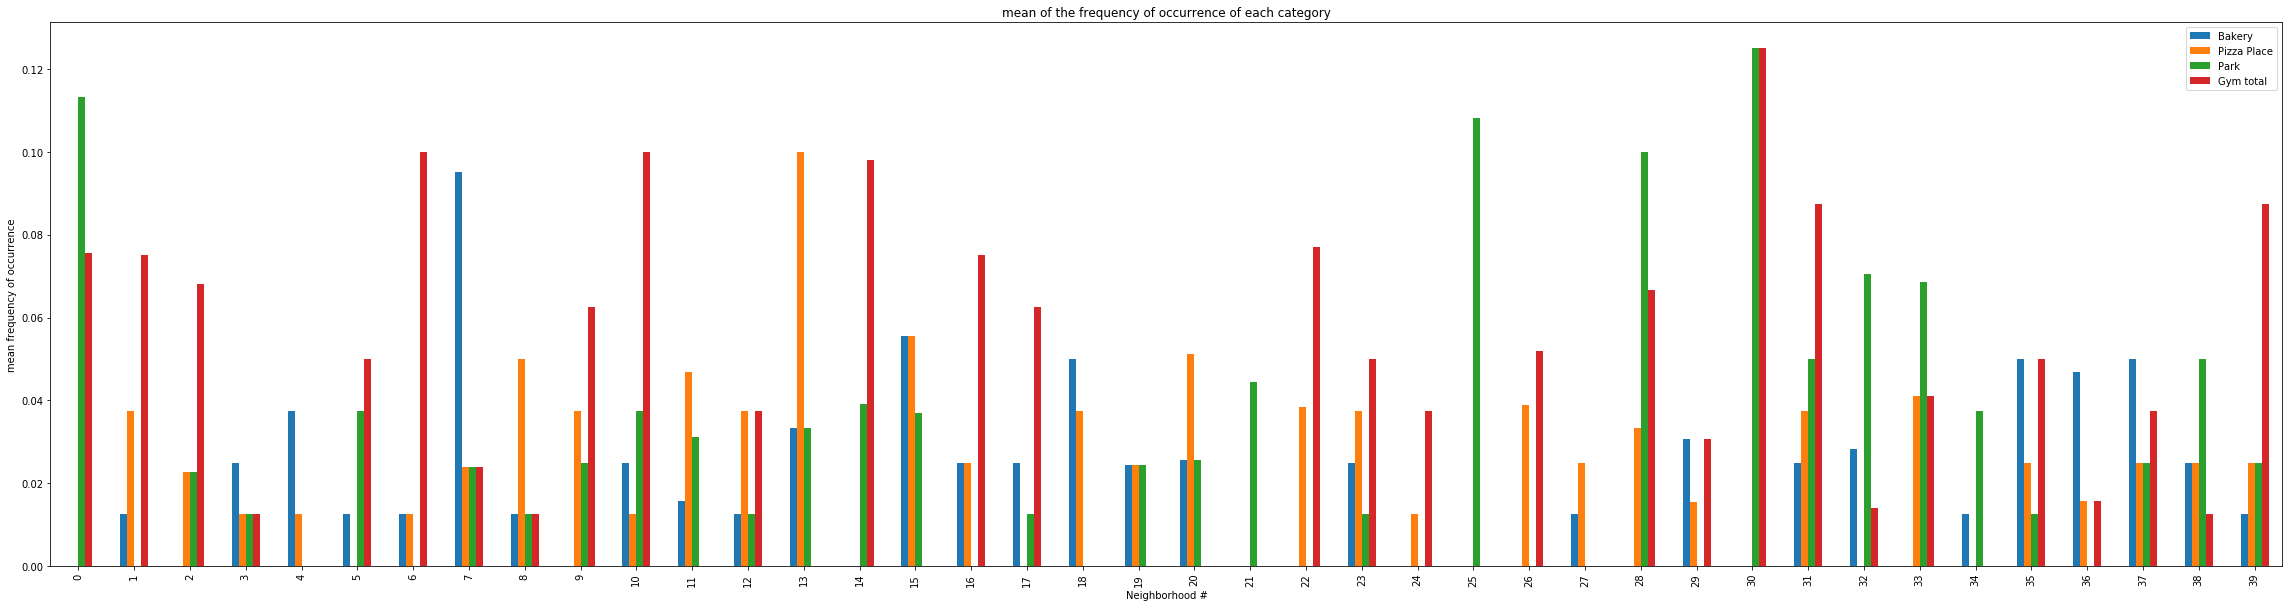

In [35]:
ax = manhattan_grouped_excerpt.plot(kind='bar', figsize=(40,10))

ax.set_title('mean of the frequency of occurrence of each category')
ax.set_xlabel('Neighborhood #')
ax.set_ylabel('mean frequency of occurrence')

ax

In [36]:
columns_sum = list(manhattan_grouped_excerpt)
columns_sum.remove("Neighborhood")
manhattan_grouped_excerpt["sum"] = manhattan_grouped_excerpt[columns_sum].sum(axis=1)

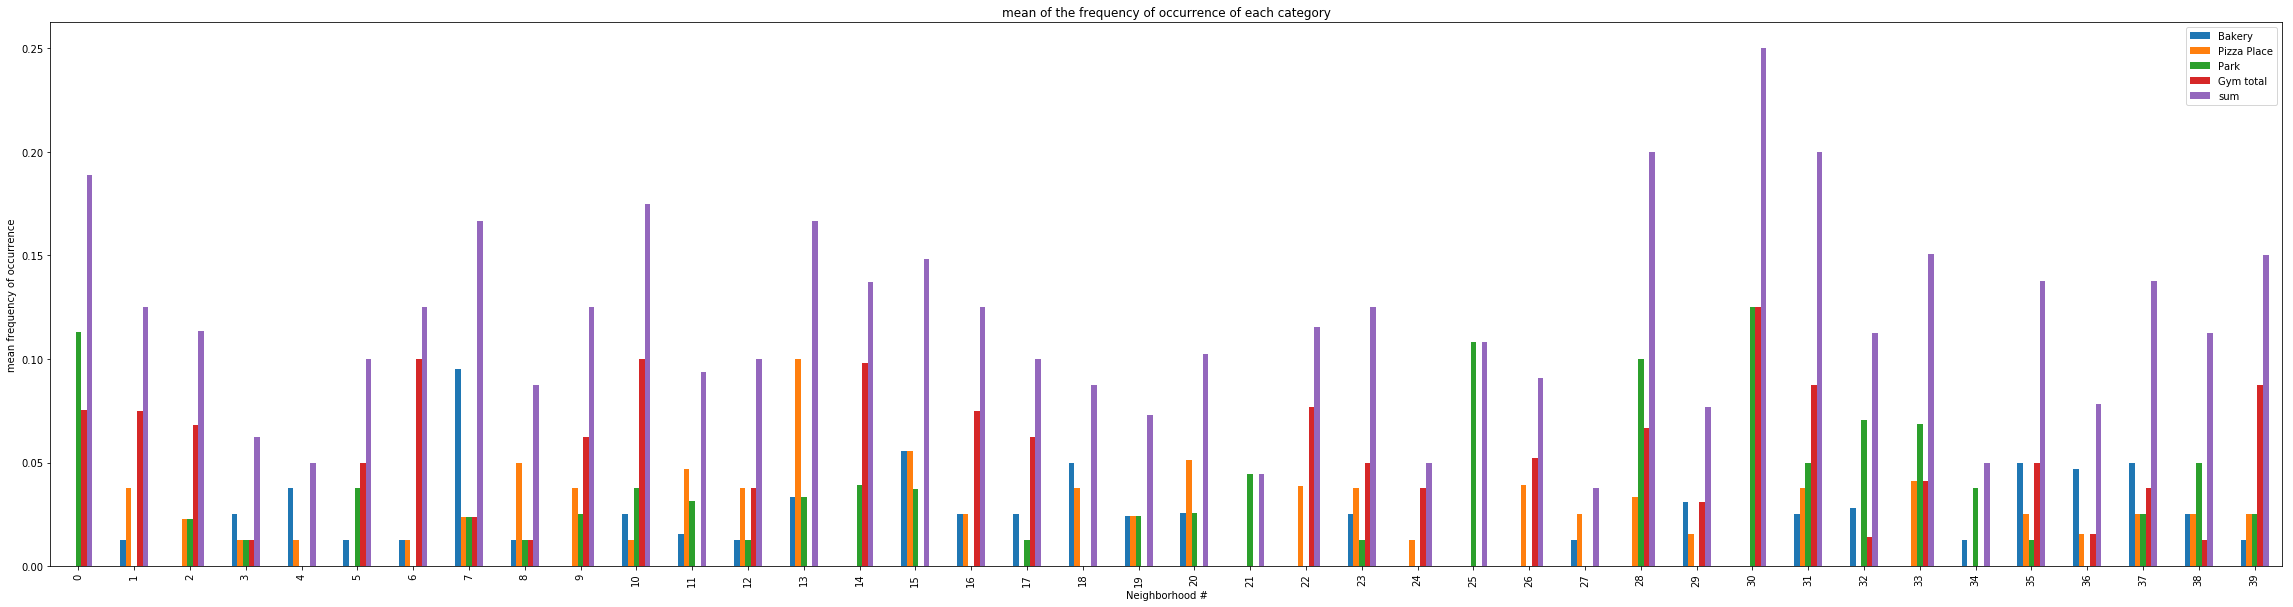

In [98]:
manhattan_grouped_excerpt.sort_values(by='sum', ascending=False) # sort table

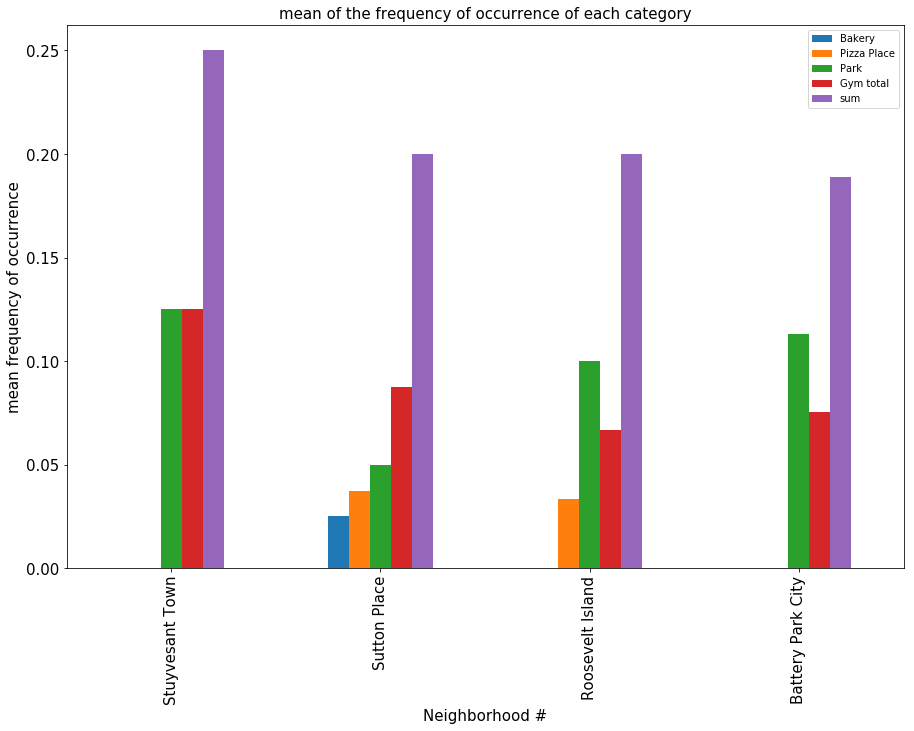

In [112]:
manhattan_vis = manhattan_grouped_excerpt.sort_values(by='sum', ascending=False).head(4)

ax = manhattan_vis.plot(kind='bar', figsize=(15,10), fontsize =15)

ax.set_title('mean of the frequency of occurrence of each category', fontsize =15)
ax.set_xlabel('Neighborhood #', fontsize =15)
ax.xaxis.set(ticklabels=["Stuyvesant Town","Sutton Place","Roosevelt Island","Battery Park City"])

ax.set_ylabel('mean frequency of occurrence', fontsize =15)

ax

In [102]:
manhattan_vis

Neighborhood  Bakery  Pizza Place      Park  Gym total       sum  \
30    Stuyvesant Town   0.000     0.000000  0.125000   0.125000  0.250000   
31       Sutton Place   0.025     0.037500  0.050000   0.087500  0.200000   
28   Roosevelt Island   0.000     0.033333  0.100000   0.066667  0.200000   
0   Battery Park City   0.000     0.000000  0.113208   0.075472  0.188679   

         City  
30  Manhattan  
31  Manhattan  
28  Manhattan  
0   Manhattan

Okay, so far so good!  

Now, let's check the Toronto data and do the same thing.

## load Toronto data  
  
For Toronto, we will be using the free dataset from Wikipedia: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M.  
I have saved the data in an xlsx file, uploaded it to IBM Watson, then put it in a pandas df, then preprocessed it as necessary...

In [38]:
# The code was removed by Watson Studio for sharing.

Postal code           Borough                Neighborhood
0         M1A      Not assigned                         NaN
1         M2A      Not assigned                         NaN
2         M3A        North York                   Parkwoods
3         M4A        North York            Victoria Village
4         M5A  Downtown Toronto  Regent Park / Harbourfront

In [39]:
# clean the data 
df_data_0 = df_data_0[~df_data_0['Borough'].isnull()]  # to filter out bad rows
df_data_0.drop(df_data_0[df_data_0.Borough == 'Not assigned'].index, inplace=True)
df_data_0.reset_index(drop=True, inplace=True)
df_data_0 = df_data_0.groupby(['Postal code','Borough'])['Neighborhood'].apply(lambda x: ','.join(x)).reset_index()
df_data_0['Neighborhood'].replace('Not assigned',df_data_0['Borough'],inplace=True)
df_data_0

Postal code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood  
0                                      Malvern / Rouge  
1             Rouge Hill / Port Union / H

In [40]:
# add goespatial coordinates (from csv file provided in the course)
body = client_499c37cd94e84c0499042e1545e0f19e.get_object(Bucket='courseraibmapplieddatasciencecaps-donotdelete-pr-ingywhspsot4ak',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_geo_coordinate = pd.read_csv(body)
df_geo_coordinate.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [41]:
df_merged = df_data_0.join(df_geo_coordinate.set_index('Postal Code'), on='Postal code')
df_merged.head()

Postal code      Borough                              Neighborhood  \
0         M1B  Scarborough                           Malvern / Rouge   
1         M1C  Scarborough  Rouge Hill / Port Union / Highland Creek   
2         M1E  Scarborough       Guildwood / Morningside / West Hill   
3         M1G  Scarborough                                    Woburn   
4         M1H  Scarborough                                 Cedarbrae   

    Latitude  Longitude  
0  43.806686 -79.194353  
1  43.784535 -79.160497  
2  43.763573 -79.188711  
3  43.770992 -79.216917  
4  43.773136 -79.239476

In [42]:
# create a new df that contains all rows that contain 'Toronto' in column 'Borough'
df_toronto = df_merged[df_merged['Borough'].str.contains('Toronto')]
df_toronto.head()

Postal code          Borough                     Neighborhood   Latitude  \
37         M4E     East Toronto                      The Beaches  43.676357   
41         M4K     East Toronto    The Danforth West / Riverdale  43.679557   
42         M4L     East Toronto  India Bazaar / The Beaches West  43.668999   
43         M4M     East Toronto                  Studio District  43.659526   
44         M4N  Central Toronto                    Lawrence Park  43.728020   

    Longitude  
37 -79.293031  
41 -79.352188  
42 -79.315572  
43 -79.340923  
44 -79.388790

In [43]:
# imports for further analysis

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Use geopy library to get the latitude and longitude values of Toronto.

In [44]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


explore the first neighborhood in our dataframe (necessary for later loop)

In [46]:
df_toronto.loc[37, 'Neighborhood']

'The Beaches'

Get the neighborhood's latitude and longitude values.

In [47]:
neighborhood_latitude = df_toronto.loc[37, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[37, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[37, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


Now, as in the case of Manhattan, let's get the top 80 venues that are in The Beaches within a radius of 400 meters

In [48]:
LIMIT = 80 # limit of number of venues returned by Foursquare API
radius = 400 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0PH2SU1HKG0SUFI5MY0O42BOXZW3E5IDPXEV2UCM5LDZIAMU&client_secret=OQJB5TF31Z055PXDKXMVRFOKI3AGVLHQ4UFGITOIDTYJPYD4&v=20200422&ll=43.67635739999999,-79.2930312&radius=400&limit=80'

In [49]:
results = requests.get(url).json()

In [50]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name            categories        lat        lng
0    Glen Manor Ravine                 Trail  43.676821 -79.293942
1  Glen Stewart Ravine  Other Great Outdoors  43.676300 -79.294784

In [51]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [52]:
def getNearbyVenues(names, latitudes, longitudes, radius=400):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [53]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighborhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

The Beaches
The Danforth West / Riverdale
India Bazaar / The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park / Summerhill East
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
Rosedale
St. James Town / Cabbagetown
Church and Wellesley
Regent Park / Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond / Adelaide / King
Harbourfront East / Union Station / Toronto Islands
Toronto Dominion Centre / Design Exchange
Commerce Court / Victoria Hotel
Roselawn
Forest Hill North & West
The Annex / North Midtown / Yorkville
University of Toronto / Harbord
Kensington Market / Chinatown / Grange Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Stn A PO Boxes
First Canadian Place / Underground city
Christie
Dufferin / Dovercourt Village
Little Portugal / Trinity
Brockton / Parkdale Village / Exhibition Place
High Park / 

Analyze Each Neighborhood of Toronto

In [54]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Airport  Airport Food Court  Airport Lounge  Airport Terminal  \
0            0        0                   0               0                 0   
1            0        0                   0               0                 0   
2            0        0                   0               0                 0   
3            0        0                   0               0                 0   
4            0        0                   0               0                 0   

   American Restaurant  Aquarium  Art Gallery  Arts & Crafts Store  \
0                    0         0            0                    0   
1                    0         0            0                    0   
2                    0         0            0                    0   
3                    0         0            0                    0   
4                    0         0            0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  BBQ Joint  Baby Store  \
0                 0                   0              0          0           0   
1                 0                   0              0          0           0   
2                 0                   0              0          0           0   
3                 0                   0              0          0           0   
4                 0                   0              0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  Basketball Stadium  \
0           0       0     0    0                 0                   0   
1           0       0     0    0                 0                   0   
2           0       0     0    0                 0                   0   
3           0       0     0    0                 0                   0   
4           0       0     0    0                 0                   0   

   Beer Bar  Beer Store  Belgian Restaurant  Bike Trail  Bistro  Bookstore  \
0         0           0                   0           0       0          0   
1         0           0                   0           0       0          0   
2         0           0                   0           0       0          0   
3         0           0                   0           0       0          0   
4         0           0                   0           0       0          0   

   Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0         0                     0               0        0                0   
1         0                     0               0        0                0   
2         0                     0               0        0                0   
3         0                     0               0        0                0   
4         0                     0               0        0                0   

   Building  Burger Joint  Burrito Place  Business Service  Butcher  Café  \
0         0             0              0                 0        0     0   
1         0             0              0                 0        0     0   
2         0             0              0                 0        0     0   
3         0             0              0                 0        0     0   
4         0             0              0                 0        0     0   

   Candy Store  Caribbean Restaurant  Cheese Shop  Chinese Restaurant  \
0            0                     0            0                   0   
1            0                     0            0                   0   
2            0                     0            0                   0   
3            0                     0            0                   0   
4            0                     0            0                   0   

   Climbing Gym  Clothing Store  Cocktail Bar  Coffee Shop  \
0             0               0             0            0   
1             0               0             0            0   
2             0               0             0            0   
3             0               0             0            0   
4      

group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [56]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio   Airport  \
0                                         Berczy Park     0.000000  0.000000   
1      Brockton / Parkdale Village / Exhibition Place     0.000000  0.000000   
2               Business reply mail Processing CentrE     0.000000  0.000000   
3   CN Tower / King and Spadina / Railway Lands / ...     0.000000  0.111111   
4                                  Central Bay Street     0.000000  0.000000   
5                                            Christie     0.000000  0.000000   
6                                Church and Wellesley     0.018182  0.000000   
7                     Commerce Court / Victoria Hotel     0.000000  0.000000   
8                                          Davisville     0.000000  0.000000   
9                                    Davisville North     0.000000  0.000000   
10                      Dufferin / Dovercourt Village     0.000000  0.000000   
11            First Canadian Place / Underground city     0.000000  0.000000   
12                           Forest Hill North & West     0.000000  0.000000   
13                           Garden District, Ryerson     0.000000  0.000000   
14  Harbourfront East / Union Station / Toronto Is...     0.000000  0.000000   
15                     High Park / The Junction South     0.000000  0.000000   
16                    India Bazaar / The Beaches West     0.000000  0.000000   
17        Kensington Market / Chinatown / Grange Park     0.000000  0.000000   
18                          Little Portugal / Trinity     0.033333  0.000000   
19                       Moore Park / Summerhill East     0.000000  0.000000   
20                                 North Toronto West     0.000000  0.000000   
21       Queen's Park / Ontario Provincial Government     0.000000  0.000000   
22                         Regent Park / Harbourfront     0.052632  0.000000   
23                         Richmond / Adelaide / King     0.000000  0.000000   
24                                           Rosedale     0.000000  0.000000   
25                                Runnymede / Swansea     0.000000  0.000000   
26                                     St. James Town     0.000000  0.000000   
27                       St. James Town / Cabbagetown     0.000000  0.000000   
28                                     Stn A PO Boxes     0.015152  0.000000   
29                                    Studio District     0.000000  0.000000   
30  Summerhill West / Rathnelly / South Hill / For...     0.000000  0.000000   
31              The Annex / North Midtown / Yorkville     0.000000  0.000000   
32                                        The Beaches     0.000000  0.000000   
33                      The Danforth West / Riverdale     0.029412  0.000000   
34          Toronto Dominion Centre / Design Exchange     0.000000  0.000000   
35                    University of Toronto / Harbord     0.038462  0.000000   

    Airport Food Court  Airport Lounge  Airport Terminal  American Restaurant  \
0             0.000000        0.000000          0.000000             0.000000   
1             0.000000        0.000000          0.000000             0.000000   
2             0.000000        0.000000          0.000000             0.000000   
3             0.111111        0.222222          0.222222             0.000000   
4             0.000000        0.000000          0.000000             0.000000   
5             0.000000        0.000000          0.000000             0.000000   
6             0.000000        0.000000          0.000000             0.000000   
7             0.000000        0.000000          0.000000             0.050000   
8             0.000000        0.000000          0.000000             0.000000   
9             0.000000        0.000000          0.000000             0.000000   
10            0.000000        0.000000          0.000000             0.000000   
11            0.000000        0.000000          0.000000             0.025000   
12            0.000000     

let's create a new df with the data of interest (i.e. Gym, Pizza, Bakery).  
Since my son doesn't box or climb, let's only combine 'Gym' and 'Gym / Fitness Center' (and neglect 'Boxing Gym' and 'Climbing Gym')

In [57]:
toronto_grouped_excerpt = toronto_grouped.filter(['Neighborhood', 'Bakery', 'Gym', 'Gym / Fitness Center', 'Pizza Place', 'Park'], axis=1)
toronto_grouped_excerpt['Gym total'] = toronto_grouped_excerpt['Gym'] + toronto_grouped_excerpt['Gym / Fitness Center'] # add the sum of Gym and Gym / Fitness Center
toronto_grouped_excerpt.head()

Neighborhood  Bakery     Gym  \
0                                        Berczy Park     0.0  0.0000   
1     Brockton / Parkdale Village / Exhibition Place     0.0  0.0625   
2              Business reply mail Processing CentrE     0.0  0.0000   
3  CN Tower / King and Spadina / Railway Lands / ...     0.0  0.0000   
4                                 Central Bay Street     0.0  0.0000   

   Gym / Fitness Center  Pizza Place      Park  Gym total  
0              0.000000     0.000000  0.052632   0.000000  
1              0.000000     0.000000  0.000000   0.062500  
2              0.000000     0.076923  0.000000   0.000000  
3              0.000000     0.000000  0.000000   0.000000  
4              0.012821     0.012821  0.012821   0.012821

filter out columns 'Gym', 'Gym / Fitness Center' because we have merged them

In [58]:
toronto_grouped_excerpt = toronto_grouped_excerpt.filter(['Neighborhood', 'Bakery', 'Pizza Place', 'Park', 'Gym total'], axis=1) # filter out old columns
toronto_grouped_excerpt.head()



Neighborhood  Bakery  Pizza Place  \
0                                        Berczy Park     0.0     0.000000   
1     Brockton / Parkdale Village / Exhibition Place     0.0     0.000000   
2              Business reply mail Processing CentrE     0.0     0.076923   
3  CN Tower / King and Spadina / Railway Lands / ...     0.0     0.000000   
4                                 Central Bay Street     0.0     0.012821   

       Park  Gym total  
0  0.052632   0.000000  
1  0.000000   0.062500  
2  0.000000   0.000000  
3  0.000000   0.000000  
4  0.012821   0.012821

let's plot the results quickly for a short glance at the data

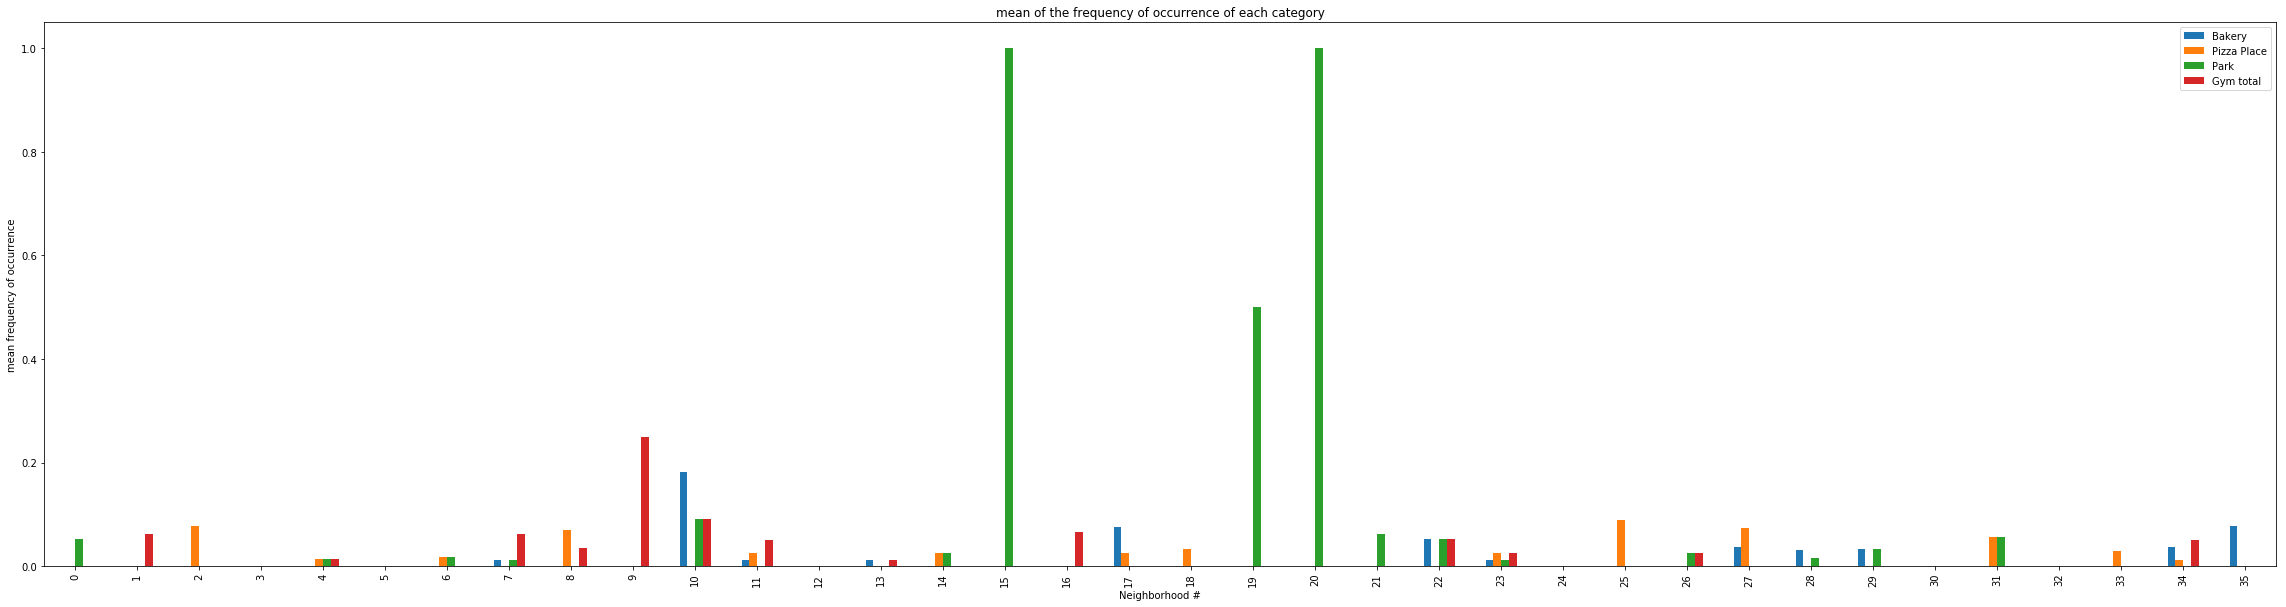

In [60]:
ax = toronto_grouped_excerpt.plot(kind='bar', figsize=(40,10))

ax.set_title('mean of the frequency of occurrence of each category')
ax.set_xlabel('Neighborhood #')
ax.set_ylabel('mean frequency of occurrence')

ax

In [61]:
columns_sum = list(toronto_grouped_excerpt)
columns_sum.remove("Neighborhood")
toronto_grouped_excerpt["sum"] = toronto_grouped_excerpt[columns_sum].sum(axis=1)

In [62]:
toronto_grouped_excerpt.sort_values(by='sum', ascending=False) # sort table

Neighborhood    Bakery  Pizza Place  \
20                                 North Toronto West  0.000000     0.000000   
15                     High Park / The Junction South  0.000000     0.000000   
19                       Moore Park / Summerhill East  0.000000     0.000000   
10                      Dufferin / Dovercourt Village  0.181818     0.000000   
9                                    Davisville North  0.000000     0.000000   
22                         Regent Park / Harbourfront  0.052632     0.000000   
31              The Annex / North Midtown / Yorkville  0.000000     0.055556   
27                       St. James Town / Cabbagetown  0.037037     0.074074   
8                                          Davisville  0.000000     0.068966   
17        Kensington Market / Chinatown / Grange Park  0.075000     0.025000   
34          Toronto Dominion Centre / Design Exchange  0.037500     0.012500   
25                                Runnymede / Swansea  0.000000     0.088235   
11            First Canadian Place / Underground city  0.012500     0.025000   
7                     Commerce Court / Victoria Hotel  0.012500     0.000000   
2               Business reply mail Processing CentrE  0.000000     0.076923   
35                    University of Toronto / Harbord  0.076923     0.000000   
23                         Richmond / Adelaide / King  0.012500     0.025000   
29                                    Studio District  0.033333     0.000000   
16                    India Bazaar / The Beaches West  0.000000     0.000000   
21       Queen's Park / Ontario Provincial Government  0.000000     0.000000   
1      Brockton / Parkdale Village / Exhibition Place  0.000000     0.000000   
0                                         Berczy Park  0.000000     0.000000   
26                                     St. James Town  0.000000     0.000000   
14  Harbourfront East / Union Station / Toronto Is...  0.000000     0.025000   
28                                     Stn A PO Boxes  0.030303     0.000000   
4                                  Central Bay Street  0.000000     0.012821   
6                                Church and Wellesley  0.000000     0.018182   
18                          Little Portugal / Trinity  0.000000     0.033333   
33                      The Danforth West / Riverdale  0.000000     0.029412   
13                           Garden District, Ryerson  0.012500     0.000000   
24                                           Rosedale  0.000000     0.000000   
12                           Forest Hill North & West  0.000000     0.000000   
5                                            Christie  0.000000     0.000000   
30  Summerhill West / Rathnelly / South Hill / For...  0.000000     0.000000   
32                                        The Beaches  0.000000     0.000000   
3   CN Tower / King and Spadina / Railway Lands / ...  0.000000     0.000000   

        Park  Gym total       sum  
20  1.000000   0.000000  1.000000  
15  1.000000   0.000000  1.000000  
19  0.500000   0.000000  0.500000  
10  0.090909   0.090909  0.363636  
9   0.000000   0.250000  0.250000  
22  0.052632   0.052632  0.157895  
31  0.055556   0.000000  0.111111  
27  0.000000   0.000000  0.111111  
8   0.000000   0.034483  0.103448  
17  0.000000   0.000000  0.100000  
34  0.000000   0.050000  0.100000  
25  0.000000   0.000000  0.088235  
11  0.000000   0.050000  0.087500  
7   0.012500   0.062500  0.087500  
2   0.000000   0.000000  0.076923  
35  0.000000   0.000000  0.076923  
23  0.012500   0.025000  0.075000  
29  0.033333   0.000000  0.066667  
16  0.000000   0.066667  0.066667  
21  0.062500   0.000000  0.062500  
1   0.000000   0.062500  0.062500  
0   0.052632   0.000000  0.052632  
26  0.025641   0.025641  0.051282  
14  0.025000   0.000000  0.050000  
28  0.015152   0.000000  0.045455  
4   0.012821   0.012821  0.038462  
6   0.018182   0.000000  0.036364  
18  0.000000   0.000000  0.033333  
33  0.000000   0.000000  0.029412  


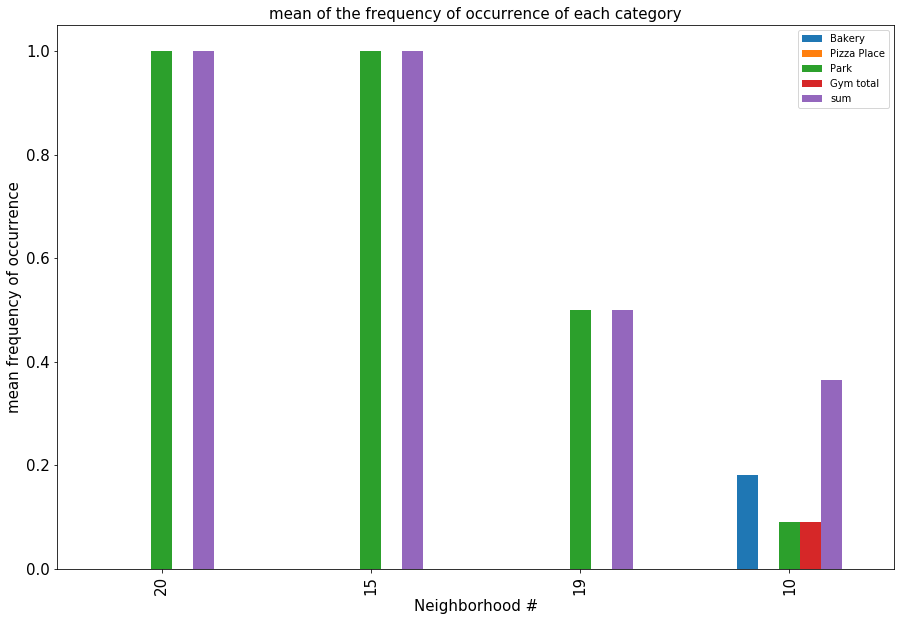

In [113]:
toronto_vis = toronto_grouped_excerpt.sort_values(by='sum', ascending=False).head(4)

ax = toronto_vis.plot(kind='bar', figsize=(15,10), fontsize =15)

ax.set_title('mean of the frequency of occurrence of each category', fontsize =15)
ax.set_xlabel('Neighborhood #', fontsize =15)
#ax.xaxis.set(ticklabels=["Stuyvesant Town","Sutton Place","Roosevelt Island","Battery Park City"])

ax.set_ylabel('mean frequency of occurrence', fontsize =15)

ax

now let's create a new table that contains good results from Manhattan and Toronto. Good, _from our family perspective_ , is every neighborhood where the mean of the frequency of the occurance of NONE of our desired categories is 0.

In [ ]:
df_best_neighborhoods = 

In [73]:
#toronto_grouped_excerpt.filter(like='0', axis=0)
toronto_grouped_excerpt[(toronto_grouped_excerpt['Bakery'] > 0) & (toronto_grouped_excerpt['Pizza Place'] > 0) & (toronto_grouped_excerpt['Park'] > 0) & (toronto_grouped_excerpt['Gym total'] > 0)]

Neighborhood  Bakery  Pizza Place    Park  Gym total    sum
23  Richmond / Adelaide / King  0.0125        0.025  0.0125      0.025  0.075

In [76]:
# add a row showing whether the neighborhood belongs to Toronto or Manhattan

In [78]:
toronto_grouped_excerpt['City'] = 'Toronto'
toronto_grouped_excerpt.head()

Neighborhood  Bakery  Pizza Place  \
0                                        Berczy Park     0.0     0.000000   
1     Brockton / Parkdale Village / Exhibition Place     0.0     0.000000   
2              Business reply mail Processing CentrE     0.0     0.076923   
3  CN Tower / King and Spadina / Railway Lands / ...     0.0     0.000000   
4                                 Central Bay Street     0.0     0.012821   

       Park  Gym total       sum     City  
0  0.052632   0.000000  0.052632  Toronto  
1  0.000000   0.062500  0.062500  Toronto  
2  0.000000   0.000000  0.076923  Toronto  
3  0.000000   0.000000  0.000000  Toronto  
4  0.012821   0.012821  0.038462  Toronto

In [79]:
manhattan_grouped_excerpt['City'] = 'Manhattan'
manhattan_grouped_excerpt.head()

Neighborhood  Bakery  Pizza Place      Park  Gym total       sum  \
0  Battery Park City  0.0000     0.000000  0.113208   0.075472  0.188679   
1      Carnegie Hill  0.0125     0.037500  0.000000   0.075000  0.125000   
2     Central Harlem  0.0000     0.022727  0.022727   0.068182  0.113636   
3            Chelsea  0.0250     0.012500  0.012500   0.012500  0.062500   
4          Chinatown  0.0375     0.012500  0.000000   0.000000  0.050000   

        City  
0  Manhattan  
1  Manhattan  
2  Manhattan  
3  Manhattan  
4  Manhattan

In [80]:
# first join the two tables
frames = [manhattan_grouped_excerpt, toronto_grouped_excerpt]
df_best_neighborhoods = pd.concat(frames)
df_best_neighborhoods

Neighborhood    Bakery  Pizza Place  \
0                                   Battery Park City  0.000000     0.000000   
1                                       Carnegie Hill  0.012500     0.037500   
2                                      Central Harlem  0.000000     0.022727   
3                                             Chelsea  0.025000     0.012500   
4                                           Chinatown  0.037500     0.012500   
5                                        Civic Center  0.012500     0.000000   
6                                             Clinton  0.012500     0.012500   
7                                         East Harlem  0.095238     0.023810   
8                                        East Village  0.012500     0.050000   
9                                  Financial District  0.000000     0.037500   
10                                           Flatiron  0.025000     0.012500   
11                                           Gramercy  0.015625     0.046875   
12                                  Greenwich Village  0.012500     0.037500   
13                                   Hamilton Heights  0.033333     0.100000   
14                                       Hudson Yards  0.000000     0.000000   
15                                             Inwood  0.055556     0.055556   
16                                         Lenox Hill  0.025000     0.025000   
17                                     Lincoln Square  0.025000     0.000000   
18                                       Little Italy  0.050000     0.037500   
19                                    Lower East Side  0.024390     0.024390   
20                                   Manhattan Valley  0.025641     0.051282   
21                                     Manhattanville  0.000000     0.000000   
22                                        Marble Hill  0.000000     0.038462   
23                                            Midtown  0.025000     0.037500   
24                                      Midtown South  0.000000     0.012500   
25                                Morningside Heights  0.000000     0.000000   
26                                        Murray Hill  0.000000     0.038961   
27                                               Noho  0.012500     0.025000   
28                                   Roosevelt Island  0.000000     0.033333   
29                                               Soho  0.030769     0.015385   
30                                    Stuyvesant Town  0.000000     0.000000   
31                                       Sutton Place  0.025000     0.037500   
32                                            Tribeca  0.028169     0.000000   
33                                         Tudor City  0.000000     0.041096   
34                                         Turtle Bay  0.012500     0.000000   
35                                    Upper East Side  0.050000     0.025000   
36                                    Upper West Side  0.046875     0.015625   
37                                 Washington Heights  0.050000     0.025000   
38                                       West Village  0.025000     0.025000   
39                                          Yorkville  0.012500     0.025000   
0                                         Berczy Park  0.000000     0.000000   
1      Brockton / Parkdale Village / Exhibition Place  0.000000     0.000000   
2               Business reply mail Processing CentrE  0.000000     0.076923   
3   CN Tower / King and Spadina / Railway Lands / ...  0.000000     0.000000   
4                                  Central Bay Street  0.000000     0.012821   
5                                            Christie  0.000000     0.000000   
6                                Church and Wellesley  0.000000     0.018182   
7                     Commerce Court / Victoria Hotel  0.012500     0.000000   
8                                          Davisville  0.000000     0.068966   
9                                    Davi

In [82]:
# now filter out rows which include a "0" in any of our favorite categories
df_best_neighborhoods = df_best_neighborhoods[(df_best_neighborhoods['Bakery'] > 0) & (df_best_neighborhoods['Pizza Place'] > 0) & (df_best_neighborhoods['Park'] > 0) & (df_best_neighborhoods['Gym total'] > 0)]
df_best_neighborhoods.sort_values(by='sum', ascending=False) # sort table

Neighborhood    Bakery  Pizza Place     Park  Gym total  \
31                Sutton Place  0.025000      0.03750  0.05000    0.08750   
10                    Flatiron  0.025000      0.01250  0.03750    0.10000   
7                  East Harlem  0.095238      0.02381  0.02381    0.02381   
39                   Yorkville  0.012500      0.02500  0.02500    0.08750   
35             Upper East Side  0.050000      0.02500  0.01250    0.05000   
37          Washington Heights  0.050000      0.02500  0.02500    0.03750   
23                     Midtown  0.025000      0.03750  0.01250    0.05000   
38                West Village  0.025000      0.02500  0.05000    0.01250   
12           Greenwich Village  0.012500      0.03750  0.01250    0.03750   
8                 East Village  0.012500      0.05000  0.01250    0.01250   
23  Richmond / Adelaide / King  0.012500      0.02500  0.01250    0.02500   
3                      Chelsea  0.025000      0.01250  0.01250    0.01250   

         sum       City  
31  0.200000  Manhattan  
10  0.175000  Manhattan  
7   0.166667  Manhattan  
39  0.150000  Manhattan  
35  0.137500  Manhattan  
37  0.137500  Manhattan  
23  0.125000  Manhattan  
38  0.112500  Manhattan  
12  0.100000  Manhattan  
8   0.087500  Manhattan  
23  0.075000    Toronto  
3   0.062500  Manhattan

Okay: this looks like we got a winner: **Sutton Place** has the highest sum of the mean frequency of the venues of most interest for my family.  
Let's plot the results...because...one more thing comes to my mind...as I enjoy the results of our analysis...

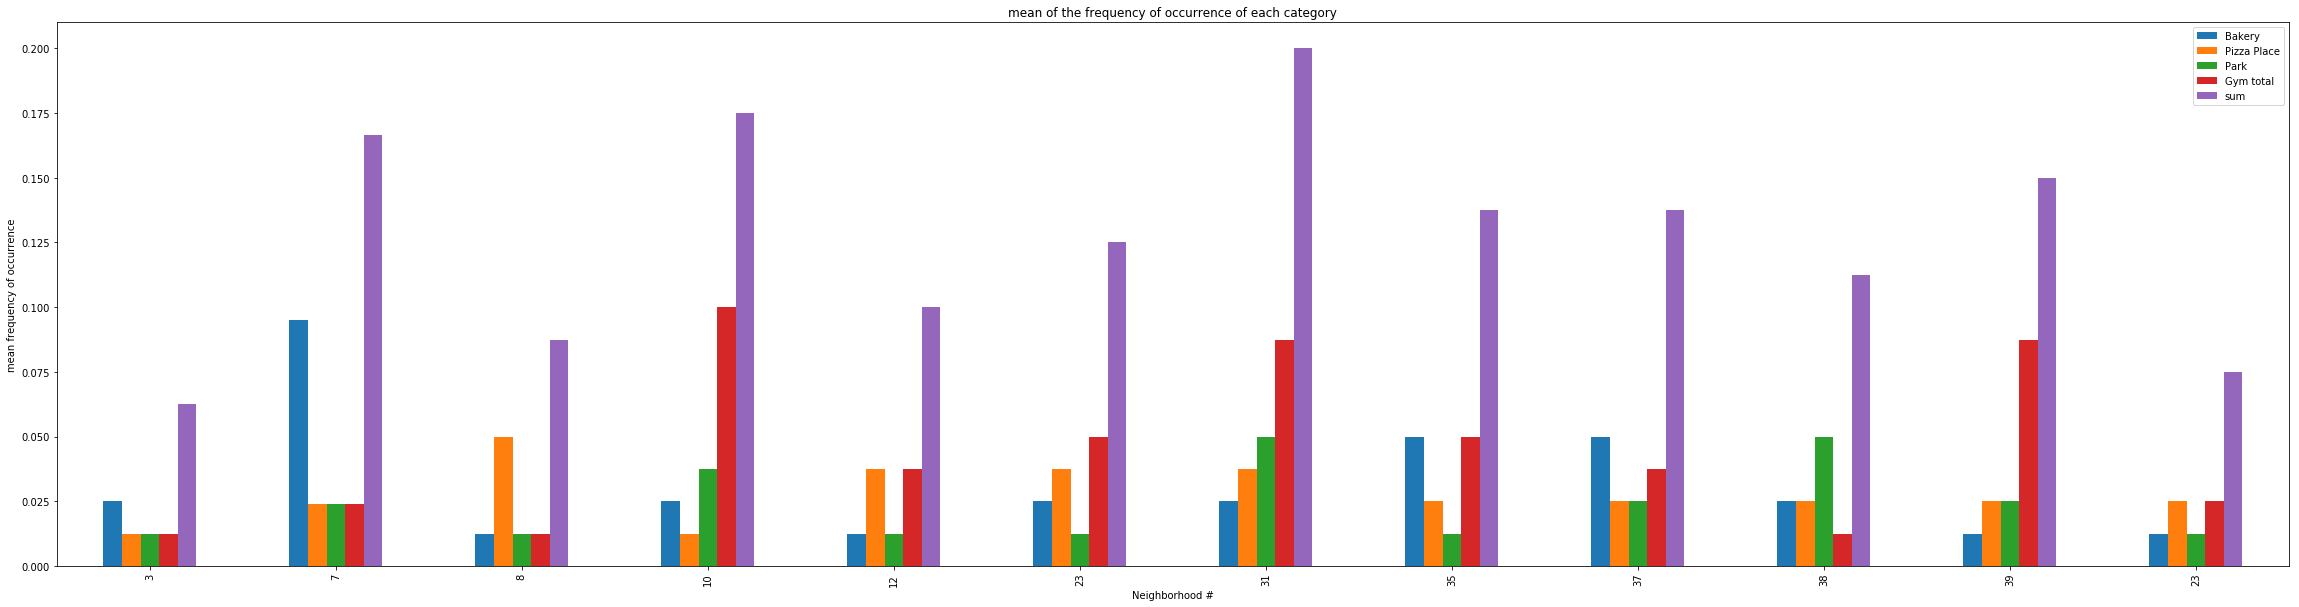

In [83]:
# let's plot the results
ax = df_best_neighborhoods.plot(kind='bar', figsize=(40,10))

ax.set_title('mean of the frequency of occurrence of each category')
ax.set_xlabel('Neighborhood #')
ax.set_ylabel('mean frequency of occurrence')

ax

...I was reminded that **real joy comes from looking out for others and loving them as I would myself**. That is what God has shown me through Jesus Christ. So, let's take out "Park" (my favorite venue) and see the results once more:...

In [89]:
df_best_neighborhoods_joy = df_best_neighborhoods.filter(['Neighborhood', 'Bakery', 'Gym total', 'Pizza Place', 'City'], axis=1)
df_best_neighborhoods_joy

Neighborhood    Bakery  Gym total  Pizza Place       City
3                      Chelsea  0.025000    0.01250      0.01250  Manhattan
7                  East Harlem  0.095238    0.02381      0.02381  Manhattan
8                 East Village  0.012500    0.01250      0.05000  Manhattan
10                    Flatiron  0.025000    0.10000      0.01250  Manhattan
12           Greenwich Village  0.012500    0.03750      0.03750  Manhattan
23                     Midtown  0.025000    0.05000      0.03750  Manhattan
31                Sutton Place  0.025000    0.08750      0.03750  Manhattan
35             Upper East Side  0.050000    0.05000      0.02500  Manhattan
37          Washington Heights  0.050000    0.03750      0.02500  Manhattan
38                West Village  0.025000    0.01250      0.02500  Manhattan
39                   Yorkville  0.012500    0.08750      0.02500  Manhattan
23  Richmond / Adelaide / King  0.012500    0.02500      0.02500    Toronto

In [90]:
# and again create the sum
columns_sum = list(df_best_neighborhoods_joy)
columns_sum.remove("Neighborhood")
df_best_neighborhoods_joy["sum"] = df_best_neighborhoods_joy[columns_sum].sum(axis=1)


In [91]:
# and show the sorted table
df_best_neighborhoods_joy.sort_values(by='sum', ascending=False) # sort table

Neighborhood    Bakery  Gym total  Pizza Place       City  \
31                Sutton Place  0.025000    0.08750      0.03750  Manhattan   
7                  East Harlem  0.095238    0.02381      0.02381  Manhattan   
10                    Flatiron  0.025000    0.10000      0.01250  Manhattan   
35             Upper East Side  0.050000    0.05000      0.02500  Manhattan   
39                   Yorkville  0.012500    0.08750      0.02500  Manhattan   
23                     Midtown  0.025000    0.05000      0.03750  Manhattan   
37          Washington Heights  0.050000    0.03750      0.02500  Manhattan   
12           Greenwich Village  0.012500    0.03750      0.03750  Manhattan   
8                 East Village  0.012500    0.01250      0.05000  Manhattan   
38                West Village  0.025000    0.01250      0.02500  Manhattan   
23  Richmond / Adelaide / King  0.012500    0.02500      0.02500    Toronto   
3                      Chelsea  0.025000    0.01250      0.01250  Manhattan   

         sum  
31  0.150000  
7   0.142857  
10  0.137500  
35  0.125000  
39  0.125000  
23  0.112500  
37  0.112500  
12  0.087500  
8   0.075000  
38  0.062500  
23  0.062500  
3   0.050000

and visualize it again...

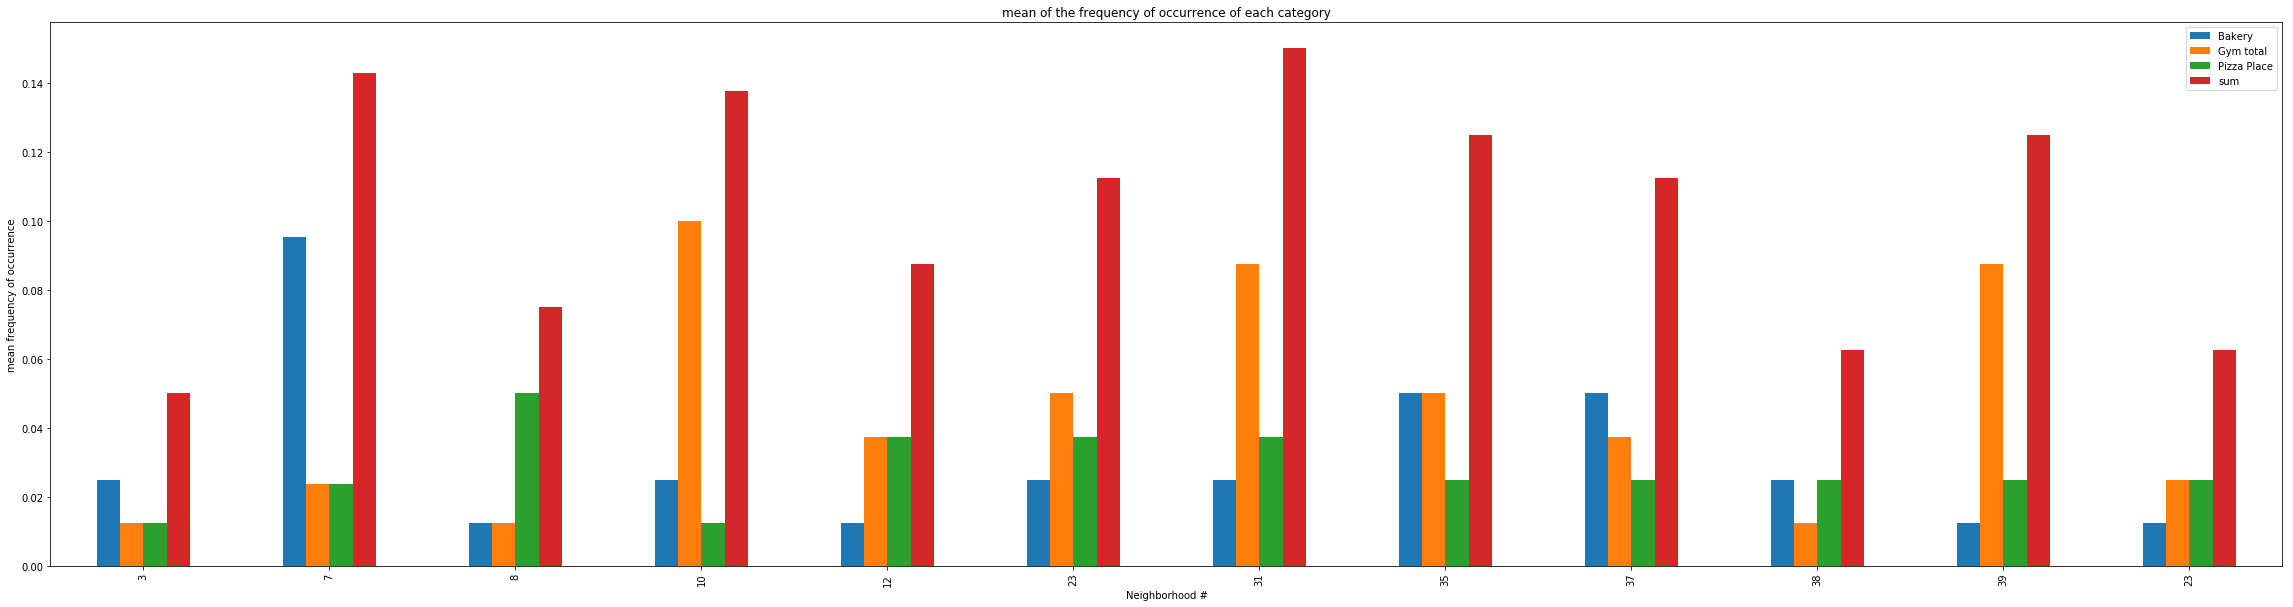

In [92]:
# let's plot the results
ax = df_best_neighborhoods_joy.plot(kind='bar', figsize=(40,10))

ax.set_title('mean of the frequency of occurrence of each category')
ax.set_xlabel('Neighborhood #')
ax.set_ylabel('mean frequency of occurrence')

ax

Now, how awesome is that?! The result stays the same! What does that show us?  
*When you care about other, God will care for you*! Win-win situation

### Results

The requirements of my 'stakeholders' where quite clear and, thank God, my wife and son didn't change their mind along the way. Thus, we analyzed each neighborhood in Toronto and Manhattan to see which neighborhood would have the highest mean frequency occurance of
* gym
* bakery
* pizza place
* park
  
    
The winner neighborhood was **Sutton Place in Manhattan**

### Discussion

Of course, there are other ways to determine what neighborhood would be fine choices for me and my family.
Possible other features might include...
  
  * distances to the venues and/or to my workplace
  * rating of the venues ("what good is a close venue when it is no good?")
  * prices of houses in the neighborhoods ("what good is it when venues are great but you cannot afford the house?")
  * criminal rate in the neighborhoods
  * quality of education in the neighborhoods
  * ...and many more

I have decided to keep it straightforward and simple for this time.  
*Why?*  

You guessed it!  
Because every stakeholder **_likes_** it, when it is **_super easy to understand_** why a certain decision was made.
Adding more features complicates the issues and in our case, was not seen to add further value to our family chocie.

### Conclusion

+ Got laid of because of Corona
+ Got two job offers: Manhattan or Toronto
+ Son wanted Gym and Pizza close, wife a bakery
+ Found out the mean average occurrence of these venues for each neighborhood in both cities with data from Foursquare
+ Sutton Place in Manhattan turned out to be the winner
+ We moved and the old wisdom proved once again to be right...


In [95]:
occurrence from IPython.display import HTML
HTML('<img src="https://www.memesmonkey.com/images/memesmonkey/7d/7d4ec4d5a620e66035eac7cfff689223.jpeg">')

Hope you enjoyed the story...